In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [17]:
def rhs(t, state):
    x1, x2, y1, y2 = state
    dx1dt = x2
    dx2dt = -2 * x1 - y1
    dy1dt = y2
    dy2dt = -2 * y1 - x1
    return [dx1dt, dx2dt, dy1dt, dy2dt]

In [18]:
def beats_rhs(t, state):
    x1, x2, y1, y2 = state
    dx1dt = x2
    dx2dt = -2 * x1 - 0.1 * y1
    dy1dt = y2
    dy2dt = -2 * y1 - 0.1 * x1
    return [dx1dt, dx2dt, dy1dt, dy2dt]

In [21]:
def time_plot(rhs, initial_state, max_time):
    time_span = (0, max_time)

    solution = solve_ivp(rhs, time_span, initial_state, method='RK45', rtol=1e-12, atol=1e-10)
    plt.figure(figsize=(10, 6))
    plt.subplot(3, 2, 1)
    plt.plot(solution.t, solution.y[0], 'b', label='x1')
    plt.xlabel('Время')
    plt.ylabel('Координата')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 2, 2)
    plt.plot(solution.t, solution.y[1], 'b', label='x2')
    plt.xlabel('Время')
    plt.ylabel('Скорость')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 2, 3)
    plt.plot(solution.t, solution.y[2], 'r', label='y1')
    plt.xlabel('Время')
    plt.ylabel('Координата')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 2, 4)
    plt.plot(solution.t, solution.y[3], 'r', label='y2')
    plt.xlabel('Время')
    plt.ylabel('Скорость')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(3, 2, 5)
    plt.plot(solution.t, solution.y[0], 'b', label='x1')
    plt.xlabel('Время')
    plt.ylabel('Координата')
    plt.legend()
    plt.plot(solution.t, solution.y[2], 'r', label='y1')
    plt.xlabel('Время')
    plt.ylabel('Координата')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(3, 2, 6)
    plt.plot(solution.t, solution.y[1], 'b', label='x2')
    plt.xlabel('Время')
    plt.ylabel('Скорость')
    plt.legend()
    plt.plot(solution.t, solution.y[3], 'r', label='y2')
    plt.xlabel('Время')
    plt.ylabel('Скорость')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

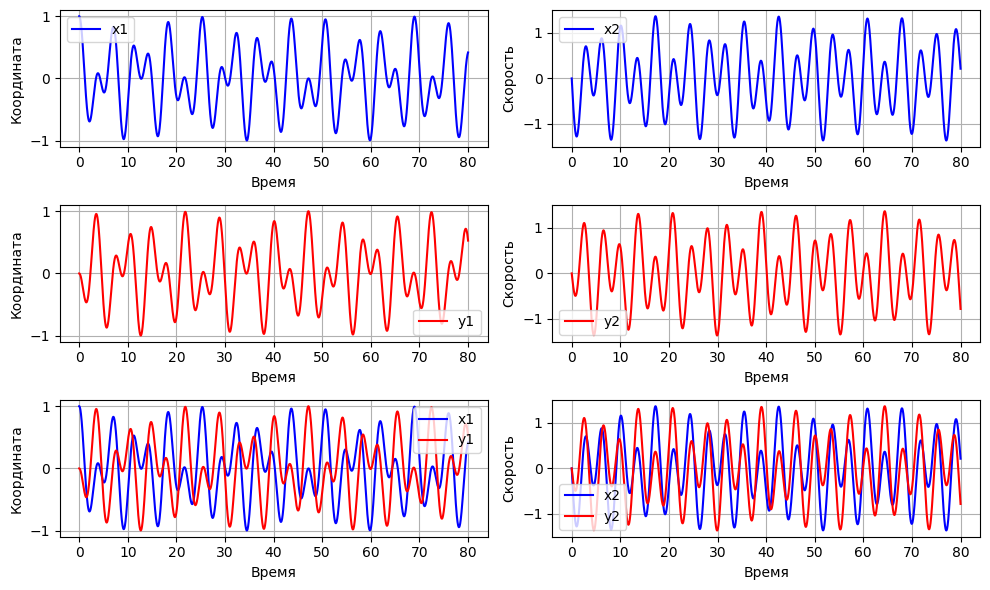

In [35]:
system_status = [1, 0, 0, 0]

time = 80

time_plot(rhs, system_status, time)

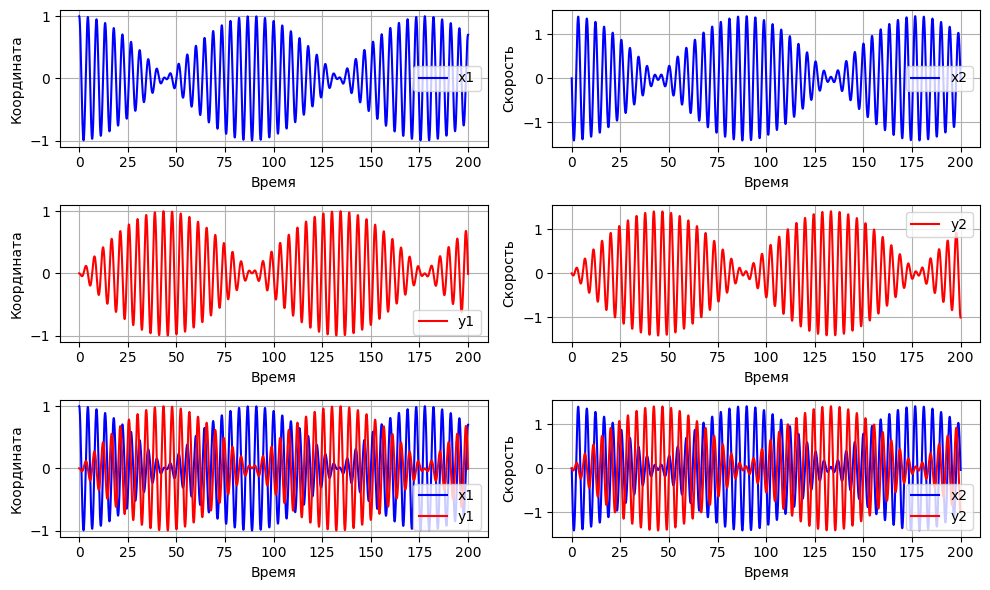

In [34]:
system_status = [1, 0, 0, 0]

time = 200

time_plot(beats_rhs, system_status, time)

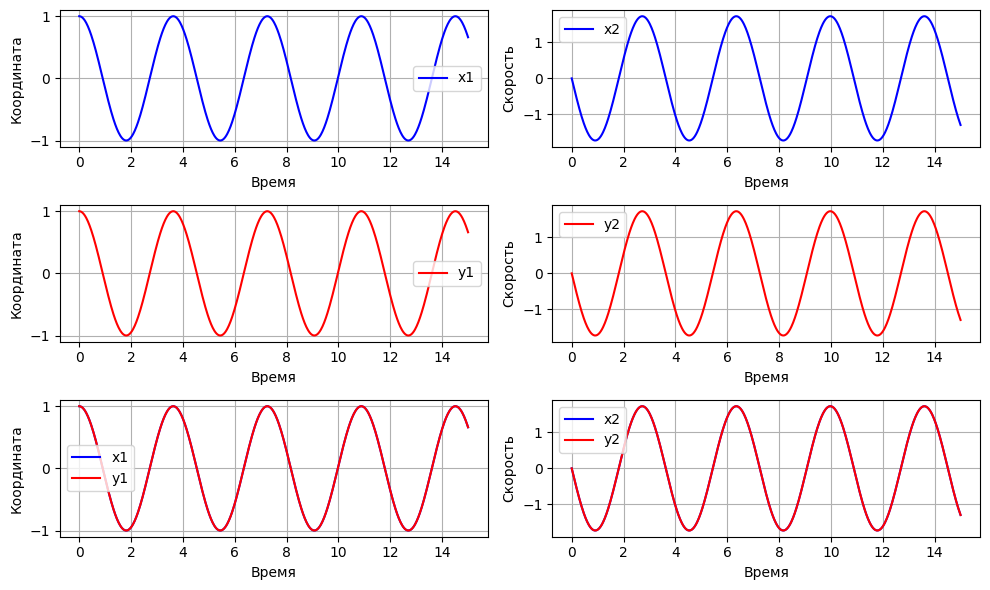

In [33]:
system_status = [1, 0, 1, 0]

time = 15

time_plot(rhs, system_status, time)

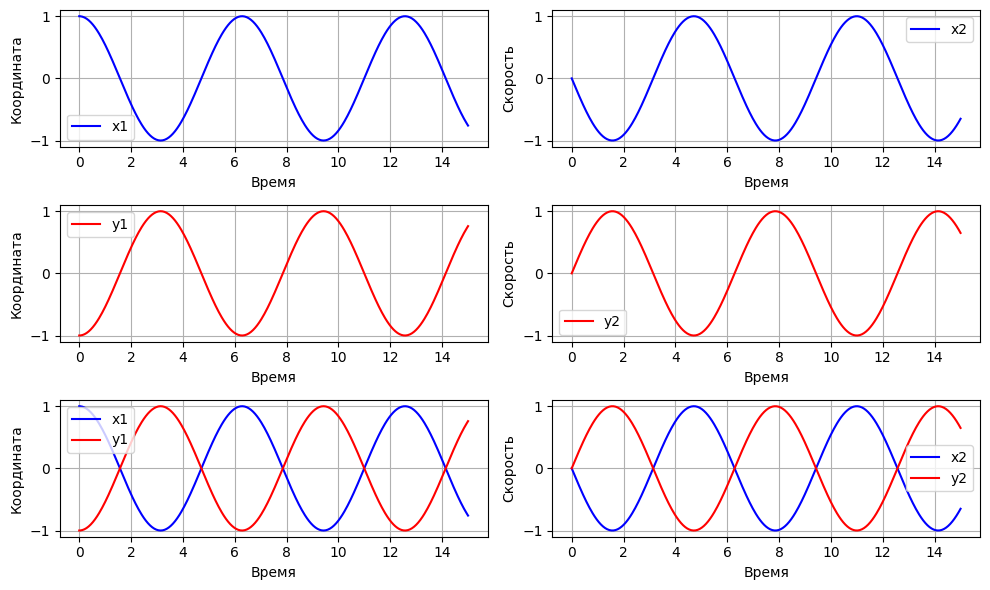

In [32]:
system_status = [1, 0, -1, 0]

time = 15

time_plot(rhs, system_status, time)

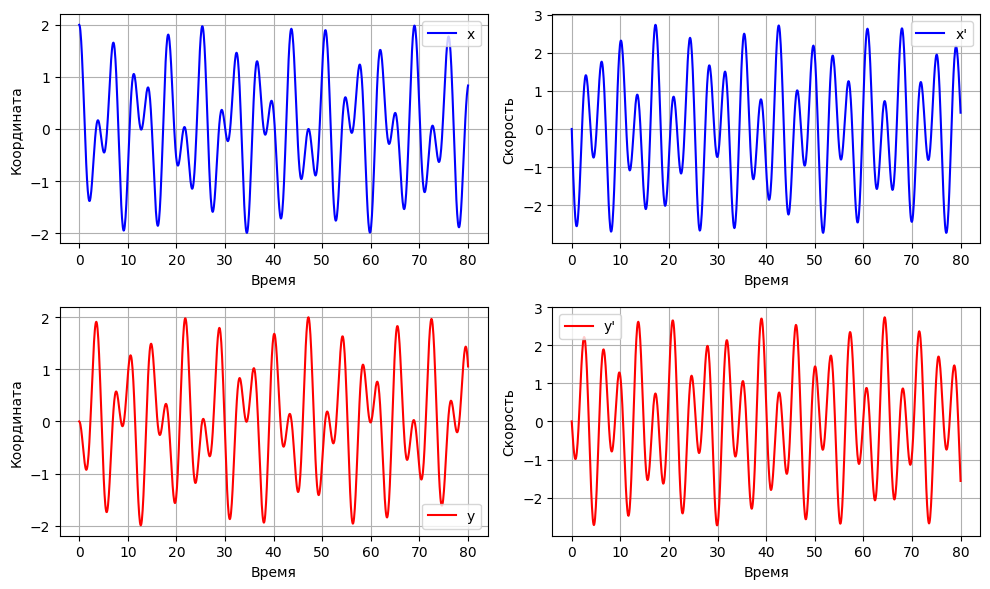

In [252]:
def normal_mode_1(t):
    amplitude_1 = 1.0
    amplitude_2 = -1.0
    amplitude_3 = 1.0
    amplitude_4 = 1.0
    w1 = 1
    w2 = 3
    x1 = amplitude_1 * np.cos(t * np.sqrt(w1)) + amplitude_3 * np.cos(t * np.sqrt(w2))
    x2 = -np.sqrt(w1) * amplitude_1 * np.sin(t * np.sqrt(w1)) - np.sqrt(w2) * amplitude_3 * np.sin(t * np.sqrt(w2))
    y1 = amplitude_2 * np.cos(t * np.sqrt(w1)) + amplitude_4 * np.cos(t * np.sqrt(w2))
    y2 = -np.sqrt(w1) * amplitude_2 * np.sin(t * np.sqrt(w1)) - np.sqrt(w2) * amplitude_4 * np.sin(t * np.sqrt(w2))
    return x1, x2, y1, y2

t = np.linspace(0, 80, 1000)

x1_1, x2_1, y1_1, y2_1 = normal_mode_1(t)

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(t, x1_1, "b", label="x")
plt.xlabel('Время')
plt.ylabel('Координата')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(t, y1_1, "r", label="y")
plt.xlabel('Время')
plt.ylabel('Координата')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t, x2_1, "b", label="x'")
plt.xlabel('Время')
plt.ylabel('Скорость')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(t, y2_1, "r", label="y'")
plt.xlabel('Время')
plt.ylabel('Скорость')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()